# Remove background from image

original [link](https://www.kaggle.com/vfdev5/data-visualization)

This demo shows simple approach to remove background from image
To solve this problem

* create mask
* apply mask to remove background

We use 

* [OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)
* [NumPy](http://www.numpy.org/)

Fisrt, import modules

In [109]:
# Importing the libraries:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Example 1 Simple binary 2D array

Let's consider a simple two dimensional ten by ten array of zeros and ones.
Then, describe background removal algorithm using by this array

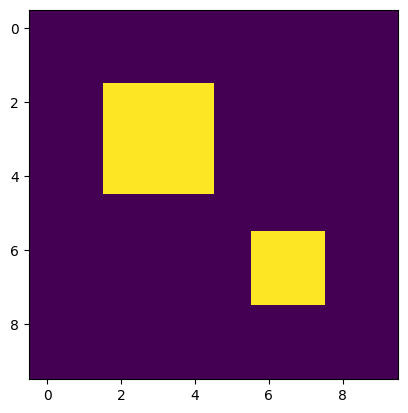

In [110]:
# Create sample array 10 by 10 from zeroes 
# It's important dtype=np.uint8
X = np.zeros((10, 10), dtype=np.uint8)

# Fill two rectangles with ones
X[2:5, 2:5] = 1
X[6:8, 6:8] = 1
        
# Finally, show binary image    
plt.imshow(X)

We've got an image with two rectangles on it
Show pixel distribution to ensure it uses only zeros and ones

<BarContainer object of 10 artists>

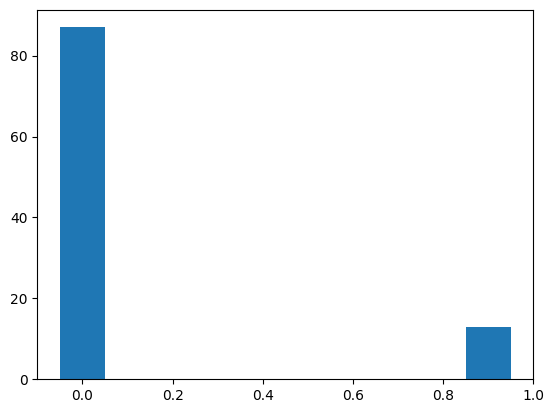

In [111]:
H = np.histogram(X)
plt.bar(H[1][:-1], H[0], width=.1)

As we can see from plot above, our image contains only 0 and 1.

### Detect contours

Next, let's find contours on image.

You can read more about contours in [OpenCV documentation](https://docs.opencv.org/3.0.0/d4/d73/tutorial_py_contours_begin.html)

In [112]:
contours, hierarchy = cv2.findContours(X,                       # Source image
                                          cv2.RETR_TREE,
                                          cv2.CHAIN_APPROX_SIMPLE  # only coordinates of corners 
                                         )

# Show contours
contours

(array([[[6, 6]],
 
        [[6, 7]],
 
        [[7, 7]],
 
        [[7, 6]]], dtype=int32),
 array([[[2, 2]],
 
        [[2, 4]],
 
        [[4, 4]],
 
        [[4, 2]]], dtype=int32))

Detected contours are presented by its corner' coordinates. You can easily match those coordinates with actual rectangles corners.

### Mask

Next step is, create mask from detected contours

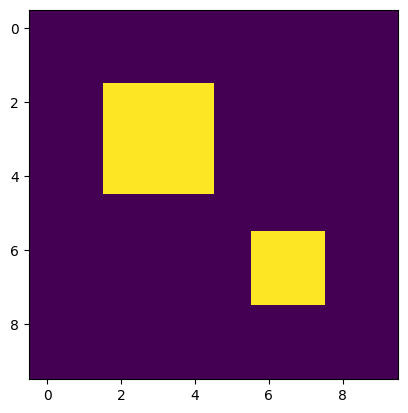

In [113]:
# Firstly, define empty mask with the shape of the original image
mask = np.zeros(shape=(X.shape[:2]), dtype=np.uint8)

# For each contour draw closed line and fill inner area of the contour with 1
cv2.drawContours(mask, contours, -1, (1,1, 0), cv2.FILLED)   

# Finally, visualise mask 
plt.imshow(mask)

### Cut of background from image by applying mask

After all, we subtract mask from image using by bitwise operator AND

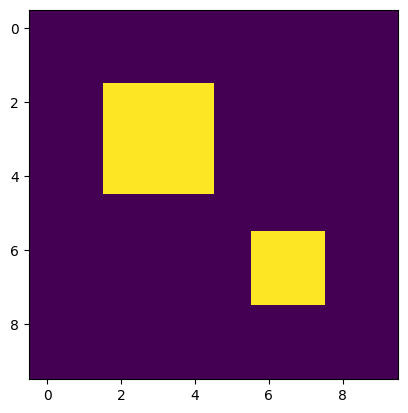

In [114]:
img_masked = cv2.bitwise_and(X, X, mask=mask)
plt.imshow(img_masked)

### Show results

Image shape: (10, 10) | image type: uint8 | mask shape: (10, 10) | mask type: uint8


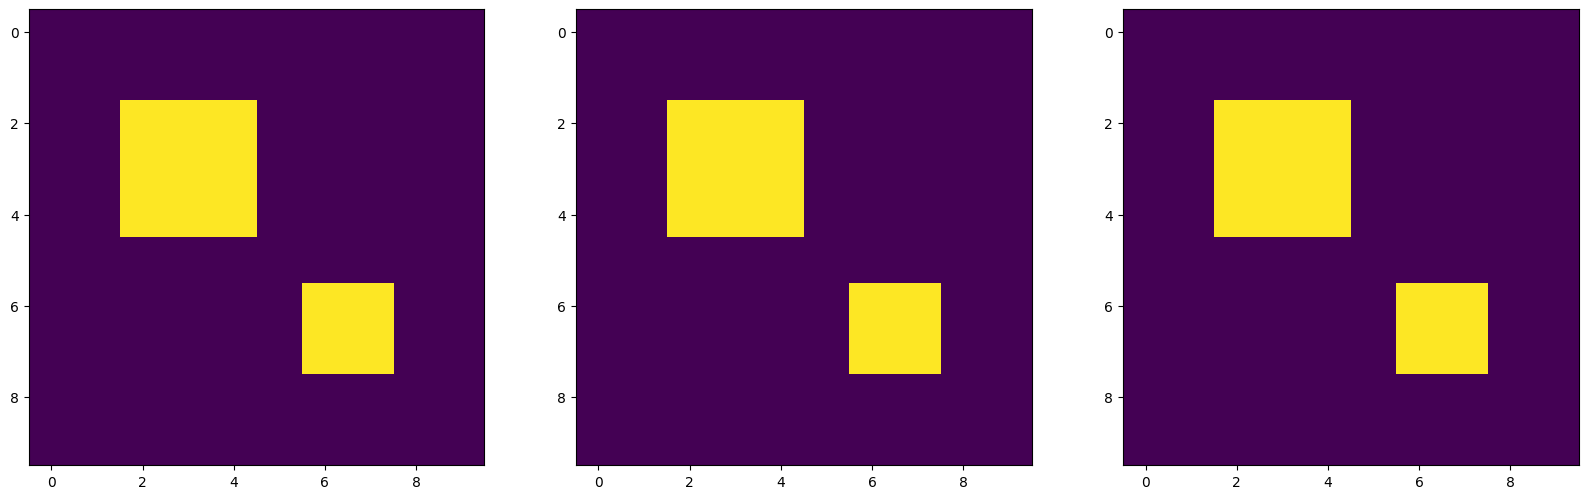

In [115]:
plt.figure(figsize=(20, 20))

print("Image shape: {} | image type: {} | mask shape: {} | mask type: {}".format(X.shape, X.dtype, mask.shape, mask.dtype) )

plt.subplot(131)
plt.imshow(X)
plt.subplot(132)
plt.imshow(mask)
plt.subplot(133)
plt.imshow(img_masked)

## Example 2.  simple 3D array represented RGB image

Before applying this method to the real images, let's show how it works on simple 3D rgb images

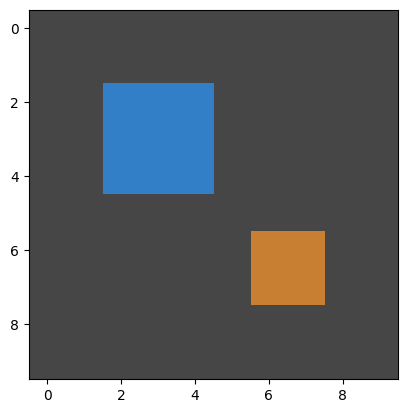

In [116]:
# Create sample array 10 by 10 from zeroes 
# It's important dtype=np.uint8
X = np.full((10, 10, 3), 70, dtype=np.uint8)

# Fill two rectangles with ones
X[2:5, 2:5, :] = [50, 127, 200]
X[6:8, 6:8, :] = [200, 127, 50]
        
# Finally, show binary image    
plt.imshow(X)

### Plot pixel value distribution

As shown in plot below, our sample binary image consists from 0 and 1.

<BarContainer object of 10 artists>

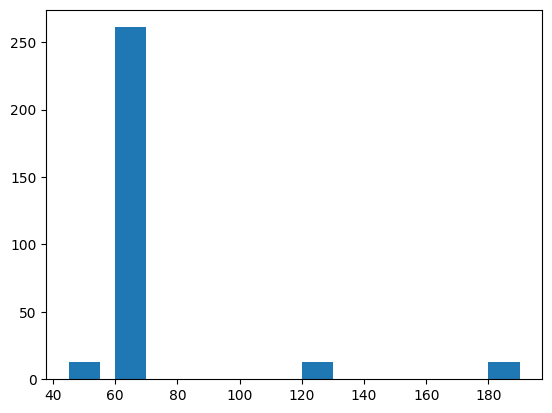

In [117]:
H = np.histogram(X)
plt.bar(H[1][:-1], H[0], width=10)

### Find contours

In [118]:
gray = (cv2.cvtColor(X, cv2.COLOR_BGR2GRAY)).astype(np.uint8)
ret,thresh = cv2.threshold(gray,
                           int(X[:, :, 0].mean()),
                           int(X[:, :, 1].mean()),
                           0)
contours, hierarchy = cv2.findContours(thresh,                       # Source image
                                          cv2.RETR_TREE,
                                          cv2.CHAIN_APPROX_SIMPLE  # only coordinates of corners 
                                         )

# Show contours
contours

(array([[[6, 6]],
 
        [[6, 7]],
 
        [[7, 7]],
 
        [[7, 6]]], dtype=int32),
 array([[[2, 2]],
 
        [[2, 4]],
 
        [[4, 4]],
 
        [[4, 2]]], dtype=int32))

### Plot mask

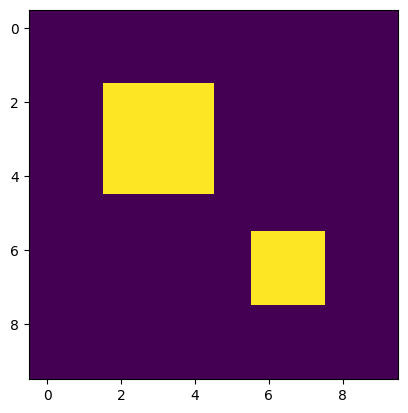

In [119]:
mask = np.zeros(shape=(X.shape[:2]), dtype=np.uint8)

cv2.drawContours(mask, contours, -1, (1,1, 0), cv2.FILLED)   

plt.imshow(mask)

### Subtract background

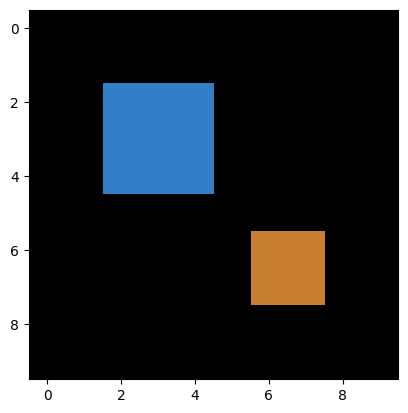

In [120]:
img_masked = cv2.bitwise_and(X, X, mask=mask)
plt.imshow(img_masked)

### Show results

Image shape: (10, 10, 3) | image type: uint8 | mask shape: (10, 10) | mask type: uint8


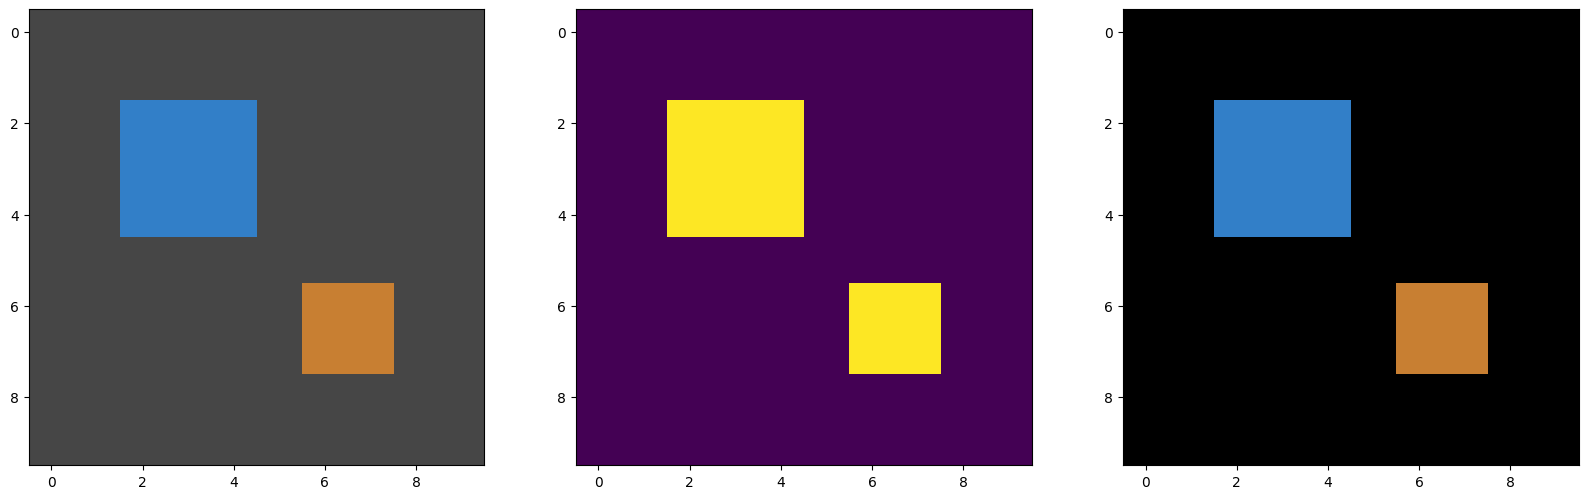

In [121]:
plt.figure(figsize=(20, 20))

print("Image shape: {} | image type: {} | mask shape: {} | mask type: {}".format(X.shape, X.dtype, mask.shape, mask.dtype) )

plt.subplot(131)
plt.imshow(X)
plt.subplot(132)
plt.imshow(mask)
plt.subplot(133)
plt.imshow(img_masked)

In [122]:
def show_image(window_name, img):
    plt.title(window_name)
    plt.imshow(img)
    plt.show()

## Example 3. Real image

This example shows approach for real image

In [123]:
# Read image 
image = cv2.imread('datasets\image1.jpg').astype(np.uint8)

# Get contours
gray = (cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)).astype(np.uint8)
ret,thresh = cv2.threshold(gray, int(image[:, :, 0].mean()), int(image[:, :, 1].mean()), 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Find contour with largest area
max_contour = max(contours, key=cv2.contourArea)

# Create mask
mask = np.zeros(shape=(gray.shape), dtype=np.uint8)
cv2.drawContours(mask, contours, -1, (1,0,0), cv2.FILLED)   
mask = (~(mask == 1) * 1).astype(np.uint8)

# cut off background
img_masked = cv2.bitwise_and(image, image, mask=mask)

Image shape: (10, 10, 3) | image type: uint8 | mask shape: (1024, 768) | mask type: uint8


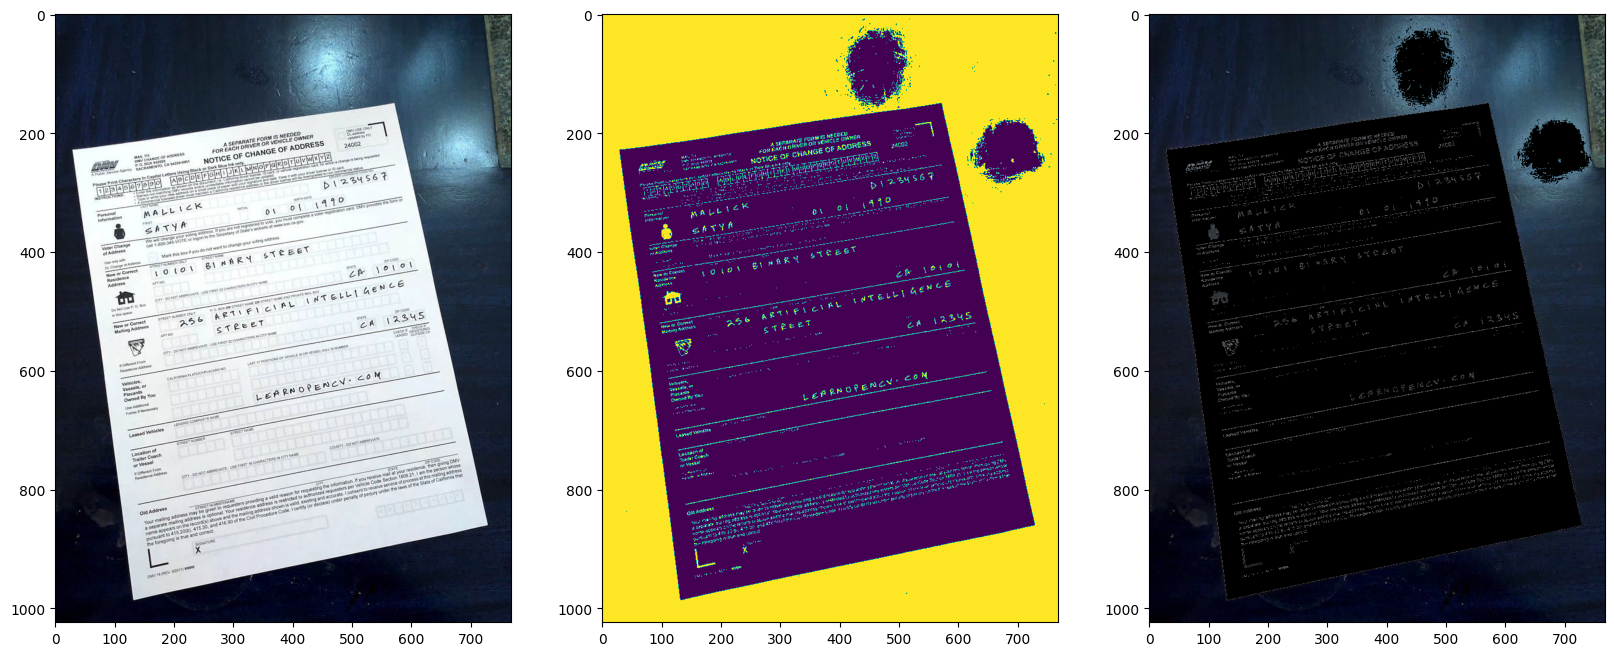

In [124]:
plt.figure(figsize=(20, 20))

print("Image shape: {} | image type: {} | mask shape: {} | mask type: {}".format(X.shape, X.dtype, mask.shape, mask.dtype) )

plt.subplot(131)
plt.imshow(image)
plt.subplot(132)
plt.imshow(mask)
plt.subplot(133)
plt.imshow(img_masked)

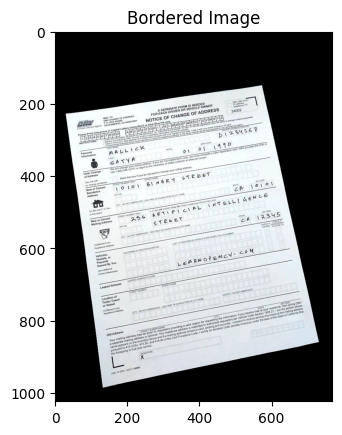

In [125]:
# Load image
image = cv2.imread('datasets\image1.jpg').astype(np.uint8)

# Get contours
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, int(image[:, :, 0].mean()), int(image[:, :, 1].mean()), 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find contour with largest area
max_contour = max(contours, key=cv2.contourArea)

# Draw contour on black background image
mask = np.zeros_like(gray)
cv2.drawContours(mask, [max_contour], 0, (255, 255, 255), -1)

# Extract bordered image using mask
bordered_image = cv2.bitwise_and(image, image, mask=mask)

show_image("Bordered Image", bordered_image)

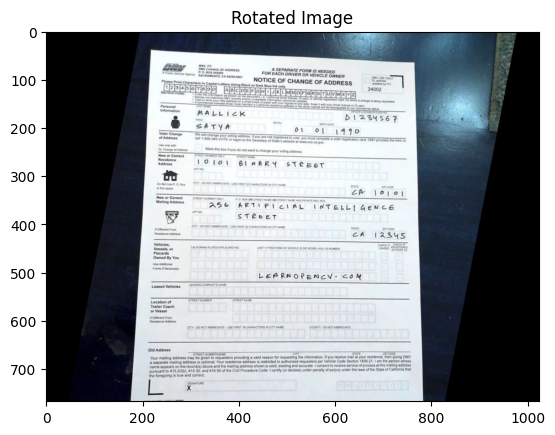

In [126]:
# Convert to grayscale
gray = cv2.cvtColor(bordered_image, cv2.COLOR_BGR2GRAY)

# Apply canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply Hough line transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# Find angles of lines with respect to horizontal axis
angles = []
for line in lines:
    rho, theta = line[0]
    if theta > np.pi/2:
        theta -= np.pi
    angle = np.degrees(theta)
    angles.append(angle)

# Rotate image by average angle
avg_angle = np.mean(angles)
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_180)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)

rows, cols = rotated_image.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), avg_angle, 1)
rotated_image = cv2.warpAffine(rotated_image, M, (cols, rows))

show_image("Rotated Image", rotated_image)

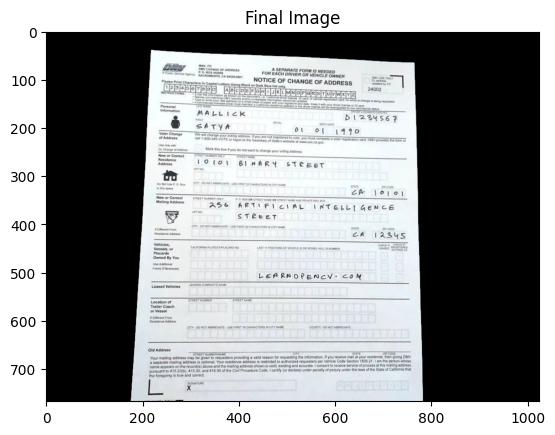

In [127]:
# Get contours
gray = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, int(image[:, :, 0].mean()), int(image[:, :, 1].mean()), 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find contour with largest area
max_contour = max(contours, key=cv2.contourArea)

# Draw contour on black background image
mask = np.zeros_like(gray)
cv2.drawContours(mask, [max_contour], 0, (255, 255, 255), -1)

# Extract bordered image using mask
final_image = cv2.bitwise_and(rotated_image, rotated_image, mask=mask)

show_image("Final Image", final_image)
